# Análisis del Acero 

### Descargar el Histórico
#### https://www.wsj.com/market-data/quotes/index/XX/STEEL/historical-prices

#### https://builtin.com/data-science/time-series-forecasting-python


In [139]:
import pandas as pd
import datetime

In [155]:
steel = pd.read_csv('./steel_2010_221101.csv')
steel

,Date,Open,High,Low,Close
0,10/31/22,1515.46,1540.19,1502.85,1527.60
1,10/28/22,1549.91,1549.91,1495.24,1515.46
2,10/27/22,1569.01,1569.01,1540.51,1549.92
3,10/26/22,1549.37,1598.02,1546.81,1569.01
4,10/25/22,1545.64,1556.36,1516.04,1549.37
...,...,...,...,...,...
3223,01/08/10,1819.66,1872.38,1819.66,1866.62
3224,01/07/10,1827.25,1827.25,1794.30,1819.66
3225,01/06/10,1785.33,1834.36,1783.68,1827.25
3226,01/05/10,1770.72,1796.94,1767.13,1785.33


In [156]:
steel = steel.drop(columns=['Open', 'Low', 'Close'])
steel = steel.rename(columns={"High": "STEEL"})

In [157]:
steel['Date'] = steel['Date'].str[0:2]+'/'+steel['Date'].str[3:5]+'/20'+steel['Date'].str[6:9]

In [158]:
steel.describe()

,STEEL
count,3228.000000
mean,1272.399777
std,360.317227
min,456.510000
25%,1036.320000
50%,1241.275000
75%,1510.945000
max,2415.200000


In [159]:
steel['Date'] = pd.to_datetime(steel['Date'], format="%m/%d/%Y")
#steel

In [160]:
steel.index = pd.to_datetime(steel['Date'], format='%Y-%m-%d')
steel.index

DatetimeIndex(['2022-10-31', '2022-10-28', '2022-10-27', '2022-10-26',
               '2022-10-25', '2022-10-24', '2022-10-21', '2022-10-20',
               '2022-10-19', '2022-10-18',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=3228, freq=None)

In [161]:
del steel['Date']

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
sns.set()

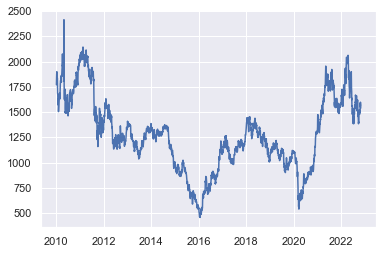

In [164]:
plt.plot(steel.index, steel['STEEL'], )

In [165]:
### Continuamos

In [180]:
data = steel.sort_values('Date')

In [181]:
data = data.tail(195)
print(data.shape)
data = data.rename(columns={"STEEL": "y"})
data

(195, 1)


,y
Date,
2022-01-24,1557.89
2022-01-25,1562.76
2022-01-26,1585.17
2022-01-27,1590.53
2022-01-28,1559.71
...,...
2022-10-25,1556.36
2022-10-26,1598.02
2022-10-27,1569.01


Train dates : 2022-01-24 00:00:00 --- 2022-09-09 00:00:00  (n=159)
Test dates  : 2022-09-12 00:00:00 --- 2022-10-31 00:00:00  (n=36)


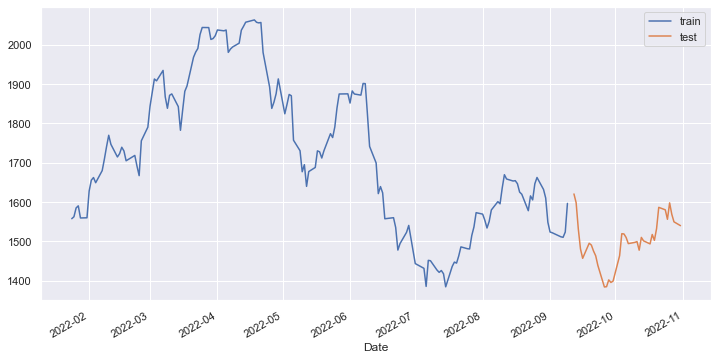

In [182]:
# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(12, 6))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [183]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

In [184]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6
             )

forecaster.fit(y=data_train['y'])
forecaster

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 158] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-11-01 23:21:41 
Last fit date: 2022-11-01 23:21:41 
Skforecast version: 0.5.1 
Python version: 3.9.12 

In [185]:
# Predictions
# ==============================================================================
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5)

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


6     1600.9346
7     1610.6765
8     1614.6589
9     1618.2583
10    1619.3436
Name: pred, dtype: float64

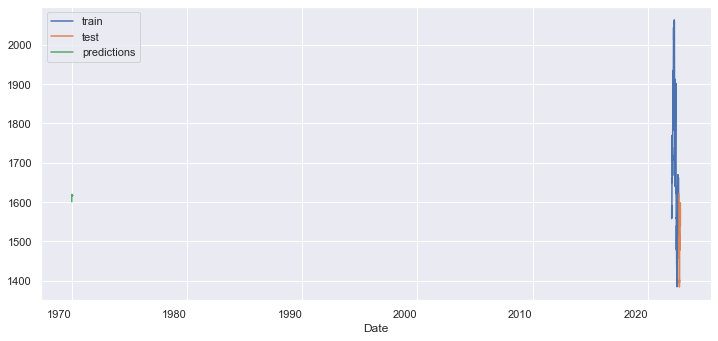

In [186]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 6))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [187]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 17012.475659270567


In [188]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


loop param_grid:   0%|                                              | 0/6 [00:00<?, ?it/s]/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/


loop param_grid:  67%|█████████████████████████▎            | 4/6 [00:27<00:15,  7.71s/it]/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor


loop param_grid:  33%|████████████▋                         | 2/6 [00:12<00:27,  6.84s/it]/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:27<00:00, 43.94s/it]
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 22320.40512140452



/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [189]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",22320.405121,3,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",22351.139786,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",23336.219190,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",23542.375765,3,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",23846.077428,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",23902.730678,5,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",24686.280627,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",24755.211620,5,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",26107.955913,10,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",26225.757403,10,500


In [190]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['y'])

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [191]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/skforecast/utils/utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


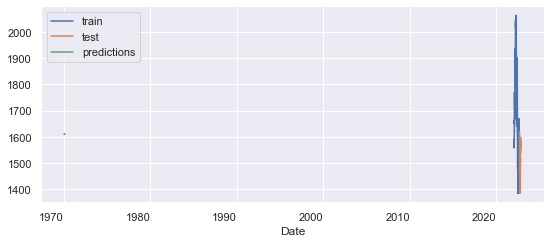

In [192]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();